# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice?!)
MODEL_DIR = Path().resolve().parent / "KuehnEtAl2023"
sys.path.append(str(MODEL_DIR))

import run_average_displacement

# View the docstrings

In [3]:
help(run_average_displacement)

Help on module run_average_displacement:

NAME
    run_average_displacement

DESCRIPTION
    This file runs the KEA23 displacement model to calculate the average displacement that is implied by the model prediction.
    - The model-implied Average Displacement is calculated as the area under the mean slip profile.
    - The mean model (i.e., mean coefficients) is used.
    - The results are returned in a pandas DataFrame.
    - Command-line use is supported; try `python run_average_displacement.py --help`
    - Module use is supported; try `from run_average_displacement import run_ad`
    
    # NOTE: This script just calls `run_displacement_profile.py` which in turn calls `run_displacement_model.py`
    
    Reference: https://doi.org/10.1177/ToBeAssigned

FUNCTIONS
    main()
    
    run_ad(*, magnitude: Union[float, int, List[Union[float, int]], numpy.ndarray], style: Union[str, List[str], numpy.ndarray]) -> pandas.core.frame.DataFrame
        Run KEA23 displacement model to calcul

# Run Average Displacement

## Single scenarios

A single scenario is defined as a magnitude/style. Here is an example (note all parameters must be passed as keyword arguments).

In [4]:
df = run_average_displacement.run_ad(magnitude=7, style="strike-slip")
df

,magnitude,style,model_number,avg_displ
0,7.0,strike-slip,-1,1.441872


In [5]:
df = run_average_displacement.run_ad(magnitude=7, style="reverse")
df

,magnitude,style,model_number,avg_displ
0,7.0,reverse,-1,1.550645


In [6]:
df = run_average_displacement.run_ad(magnitude=7, style="normal")
df

,magnitude,style,model_number,avg_displ
0,7.0,normal,-1,1.465161


## Multiple scenarios

Because the profiles are based on the mean model coefficients (this is hard-coded in run_average_displacement.py), multiple mangitudes or styles can be run.

In [7]:
df = run_average_displacement.run_ad(
    magnitude=[5, 6, 7, 8], style=["strike-slip", "reverse"]
)
df

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\KuehnEtAl2023\run_displacement_model.py:64: RuntimeWarning: invalid value encountered in power
  D_mean = (np.power(lam * mu + 1, 1 / lam)) * (


,magnitude,style,model_number,avg_displ
0,5.0,reverse,-1,0.148525
1,5.0,strike-slip,-1,0.000460
2,6.0,reverse,-1,0.521413
3,6.0,strike-slip,-1,0.102500
4,7.0,reverse,-1,1.550645
5,7.0,strike-slip,-1,1.441872
6,8.0,reverse,-1,3.663152
7,8.0,strike-slip,-1,4.920777


## Create magnitude scaling plots

In [8]:
magnitudes, styles = np.arange(5, 8.6, 0.1), ["strike-slip", "reverse", "normal"]

df = run_average_displacement.run_ad(magnitude=magnitudes, style=styles)

df.head()

D:\Documents\_mydocs\Work FDHI\TEAM\Journal\kea23\KuehnEtAl2023\run_displacement_model.py:64: RuntimeWarning: invalid value encountered in power
  D_mean = (np.power(lam * mu + 1, 1 / lam)) * (


,magnitude,style,model_number,avg_displ
0,5.0,normal,-1,0.000703
1,5.0,reverse,-1,0.148525
2,5.0,strike-slip,-1,0.000460
3,5.1,normal,-1,0.001307
4,5.1,reverse,-1,0.169804


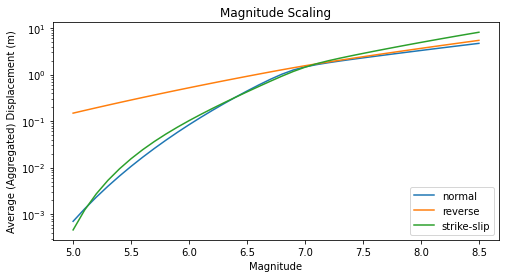

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

for sof, group in df.groupby(["style"]):
    group = group.sort_values(by="magnitude")
    ax.semilogy(group["magnitude"], group["avg_displ"], label=sof)

ax.set(
    xlabel="Magnitude",
    ylabel="Average (Aggregated) Displacement (m)",
    title="Magnitude Scaling",
)
ax.legend(loc="lower right")
# plt.savefig("magnitude_scaling_ad.png", bbox_inches="tight")